# Assignment 2
This is due by 5pm on Friday 21st February. The mark breakdown is:

- Q0 [1 marks]
- Q1 [10 marks]
- Q2 [10 marks]
- Q3 [9 marks]

It is adviseable that you tidy up your notebook before submitting the final version. Also, remember to add comments to your code.

# Question 0

You should have saved this notebook to your ACM20030-Assignments folder. Now:
- commit the notebook to your local repository
- push the changes to the GitHub

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# The below commands make the font and image size bigger
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (15,10)

# Question 1: Bisection method

### Q. 1a
Define a function for the quintic $f(x) = x^5+12 x^4-15 x^3-386 x^2-180 x+1800$ and plot it in the range $x=-11\dots6$

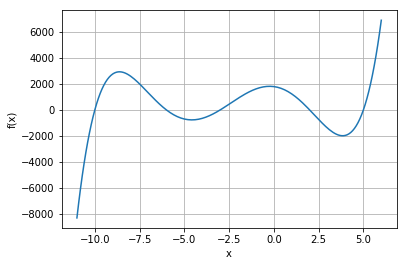

In [2]:
# Defining the quintic function
def f(x):
    result = x**5 + 12*x**4 - 15*x**3 - 386*x**2 -180*x + 1800
    return result

# Setting up a vector for the x range -11 to 6
x = np.arange(-11,6.1,0.1)
y = f(x)

# Plotting the function
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.show()

### Q. 1b
Using the plot, pick values of $a$ and $b$ such that $f(a) < 0$ and $f(b) > 0$ and the function has a **single** root in the region $(a,b)$. Assign variables called a and b to these values and print the values of $f(a)$ and $f(b)$.

In [3]:
#Assigning values to variables 'a' and 'b'
a = -10.5
b = -8
print("f(a) = " + str(f(a)))
print("f(b) = " + str(f(b)))

f(a) = -3269.53125
f(b) = 2600


Use the following FindRootBisection method to find the root to within a precision of $10^{-12}$

In [4]:
# This function only works when a < b and f(a) < 0 < f(b)
def FindRootBisection(f, a, b, tol, printSteps=False):
    left = a
    right = b
    while right-left > tol:
        midpoint = (left+right)/2
        if(f(midpoint) < 0):
            left = midpoint
        else:
            right = midpoint
        if(printSteps == True):
            print(midpoint)
    return midpoint

In [24]:
# Finding the root using the chosen values for 'a' and 'b' to a precision of 10^-12
root = FindRootBisection(f, a, b, 10**-12, printSteps=True)
print('Root is ' + str(root))

-9.25
-9.875
-10.1875
-10.03125
-9.953125
-9.9921875
-10.01171875
-10.001953125
-9.9970703125
-9.99951171875
-10.000732421875
-10.0001220703125
-9.99981689453125
-9.999969482421875
-10.000045776367188
-10.000007629394531
-9.999988555908203
-9.999998092651367
-10.00000286102295
-10.000000476837158
-9.999999284744263
-9.99999988079071
-10.000000178813934
-10.000000029802322
-9.999999955296516
-9.99999999254942
-10.000000011175871
-10.000000001862645
-9.999999997206032
-9.999999999534339
-10.000000000698492
-10.000000000116415
-9.999999999825377
-9.999999999970896
-10.000000000043656
-10.000000000007276
-9.999999999989086
-9.999999999998181
-10.000000000002728
-10.000000000000455
-9.999999999999318
-9.999999999999886
Root is -9.999999999999886


### Q. 1c
As the comment on the above FindRootBisection( ) function says it only works when $a<b$ and $f(a) < 0 < f(b)$. Create a new function that: 
 - **also** works when $f(a) > 0 > f(b)$. 
 - Checks that $\text{sign}(f(a)) \neq \text{sign}(f(b))$. If not the function should return "Cannot use bisection method as sign(f(a)) = sign(f(b)) ", where $a$ and $b$ have been replaced by their values
 
Call your new function FindRootBisectionImproved( ).  
Useful function: np.sign(x) will return sign(x)

Check your new function by:
 - finding the root between $x = 2.5$ and $x=6$
 - attempting to find a root between $x=6$ and $x=8$ (there is no root in this region)

In [25]:
def FindRootBisectionImproved(f, a, b, tol, printSteps=False):
    if np.sign(f(a)) == np.sign(f(b)):
        print("Cannot use bisection method as sign(f("+str(a)+")) = sign(f("+str(b)+"))")
        return None
    # Fix: assigns the lesser variable of 'a' and 'b' to the 'left' variable and the greater to 'right' using an if-else statement
    if a<b:
        left = a
        right = b
    else:
        left = b
        right = a
    # Logic below unchanged from above code
    while right-left > tol:
        midpoint = (left+right)/2
        if(f(midpoint) < 0):
            left = midpoint
        else:
            right = midpoint
        if(printSteps == True):
            print(midpoint)
    return midpoint

In [26]:
# Finding the root between x=2.5 and x=6
FindRootBisectionImproved(f, 2.5, 6, 10**-12, printSteps=True)

# Attempting to find the root between x=6 and x=8
FindRootBisectionImproved(f, 6, 8, 10**-12, printSteps=True)

4.25
5.125
4.6875
4.90625
5.015625
4.9609375
4.98828125
5.001953125
4.9951171875
4.99853515625
5.000244140625
4.9993896484375
4.99981689453125
5.000030517578125
4.9999237060546875
4.999977111816406
5.000003814697266
4.999990463256836
4.999997138977051
5.000000476837158
4.9999988079071045
4.999999642372131
5.000000059604645
4.999999850988388
4.999999955296516
5.000000007450581
4.9999999813735485
4.9999999944120646
5.000000000931323
4.999999997671694
4.999999999301508
5.000000000116415
4.999999999708962
4.9999999999126885
5.000000000014552
4.99999999996362
4.999999999989086
5.000000000001819
4.9999999999954525
4.999999999998636
5.000000000000227
4.999999999999432
Cannot use bisection method as sign(f(6)) = sign(f(8))


**Commit this question to your git repository and push the changes to GitHub**

## Question 2: Newton-Raphson method

### Q. 2a
 - Define a function $p(x) = \sinh^{-1} x$. Calculate its derivative and define it as $dp(x) = \dots$
 - Plot the function between $x=-11$ and $x=6$. Label the plot axes and use a grid.

In [8]:
# Definition of p(x) function
def p(x):
    return np.arcsinh(x)
# Definition of p'(x)
def dp(x):
    return 1/np.sqrt(1+x**2)

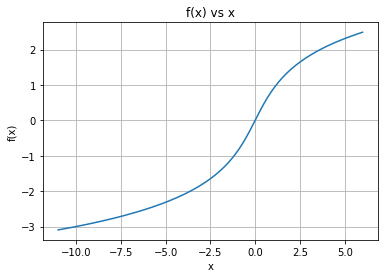

In [9]:
# Creating an array in the range -11 to 6
x = np.arange(-11,6.1,0.1)
y = p(x)

# Plotting p(x) in the range -11 to 6
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.title("f(x) vs x")
plt.show()

### Q. 2b
 - Starting with a value near the root use the below Newton-Raphson code to find the root

In [10]:
def FindRootNewtonRaphson(f, df, x0, tol, printSteps=False):
    f0 = f(x0)
    count = 1
    while np.abs(f0) > tol and count < 20:
        f0 = f(x0)
        x0 = x0 - f0/df(x0)
        count += 1
        if(printSteps):
            print("x_%d = %.14lf" % (count, x0))
    return x0

In [28]:
# Finding the root starting near the root value (x=0.1)
FindRootNewtonRaphson(p, dp, 0.1, 0.01, printSteps=True)
# Hence the algebraic root is 0, as shown by the steps within the tolerance

x_2 = -0.00033200756862
x_3 = 0.00000000001220


1.2198956471712319e-11

### Q. 2c
As we discussed in the lectures, the Newton-Raphson method (usually) converges quadradically if an initial guess is given that is sufficiently close to the root. If the guess is too far from the root the method can diverge. In this question we will find the critical value between converging and diverging where the method oscilliates with period 2.

If we define $F(x) = x - p(x)/p'(x)$, then a period-2 orbit will occur when $F(F(x)) = x$. In general this will be a complicated function so it might be very difficult to find the solution analytically. Instead, we can write this equation as $F(F(x)) - x = 0$, so the value of $x$ we want is the root.

- Define a function F(x)
- Define a function F2(x) which returns $F(F(x)) - x$
- Plot F2(x) with labels and a grid

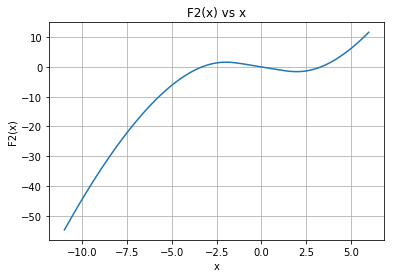

In [29]:
# Defining F(x)
def F(x):
    result = x-p(x)/dp(x)
    return result
# Defining F2(x) = F(F(x)) - x
def F2(x):
    result = F(F(x))-x
    return result

# Creating an array in the range -11 to 6 to plot F2(x) against
x = np.arange(-11,6.1,0.1)
y = F2(x)

# Plotting F2(x) with labels and a grid
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("F2(x)")
plt.grid()
plt.title("F2(x) vs x")
plt.show()

- We want to find a root with $x \neq 0$. As we don't have easy access to the derivative of the function $F2(x)$ use the bisection method function from above to find a root of $F2(x)$ to a precision of $10^{-15}$. Use the plot from the previous part to bracket a root. **Assign** the vaue of the root of the variable 'x2' and also print(x2).
- Use the Newton-Raphson method with the function $p(x)$ and the initial guess x2. Set the final argument to True to print out the steps in the method takes. You should see that they oscillate between two values and the algorithm does not converge.

In [13]:
# Finding a root of F2(x) using the bisection method function to a precision of 10^-15
x2 = FindRootBisectionImproved(F2, 1, 5, 10**-15, printSteps=False)
# Printing 'x2'
print(x2)

# Running the Newton-Raphson function with the initial guess 'x2'
FindRootNewtonRaphson(p, dp, x2, 10**-15, printSteps=True)
#The function oscillates between two numbers (or a certain range around two numbers)
#Thus the algorithm does not converge

3.3198263863951487
x_2 = -3.31982638639515
x_3 = 3.31982638639515
x_4 = -3.31982638639515
x_5 = 3.31982638639515
x_6 = -3.31982638639516
x_7 = 3.31982638639517
x_8 = -3.31982638639519
x_9 = 3.31982638639522
x_10 = -3.31982638639528
x_11 = 3.31982638639538
x_12 = -3.31982638639558
x_13 = 3.31982638639593
x_14 = -3.31982638639658
x_15 = 3.31982638639778
x_16 = -3.31982638639997
x_17 = 3.31982638640399
x_18 = -3.31982638641136
x_19 = 3.31982638642488
x_20 = -3.31982638644966


-3.3198263864496607

By slightly perturbing the initial guess we can get the method to converge or diverge. Try:
 - adding $10^{-3}$ to the initial guess. Does the method converge or diverge?
 - subtracting $10^{-3}$ from the initial guess. Does the method converge or diverge?
 
In both cases set the final argument to 'True' to get the function to print the steps the method is taking

In [30]:
# Adding 10^-3 to 'x2' and assigning it to 'x3'
# Subtracting 10^-3 from 'x2' and assigning it to 'x4'
x3 = x2 + 10**-3
x4 = x2 - 10**-3

# Running the Newton-Raphson function for 'x3' and 'x4', printing the steps
FindRootNewtonRaphson(p, dp, x3, 10**-15, printSteps=True)
#The function oscillates between positive and negative, tending toward larger values. Thus the algorithm does not converge

FindRootNewtonRaphson(p, dp, x4, 10**-15, printSteps=True)
#The function converges to the zero root

x_2 = -3.32166017534519
x_3 = 3.32318941448715
x_4 = -3.32599474945762
x_5 = 3.33114299306828
x_6 = -3.34059743357331
x_7 = 3.35798209341784
x_8 = -3.39002330308570
x_9 = 3.44932929068402
x_10 = -3.55995186656902
x_11 = 3.76918950842535
x_12 = -4.17488530024873
x_13 = 4.99611226215040
x_14 = -6.78235424035062
x_15 = 11.13059074592057
x_16 = -23.56748729018789
x_17 = 67.33071923403993
x_18 = -262.81601050239101
x_19 = 1383.63440312091529
x_20 = -9582.52377428959335
x_2 = -3.31799291955419
x_3 = 3.31646503192368
x_4 = -3.31366473335724
x_5 = 3.30853432591229
x_6 = -3.29914150942784
x_7 = 3.28196707676465
x_8 = -3.25063825727745
x_9 = 3.19373767283563
x_10 = -3.09122130707552
x_11 = 2.90927347399647
x_12 = -2.59540431535339
x_13 = 2.08314783302632
x_14 = -1.33723662271008
x_15 = 0.50112317029319
x_16 = -0.03825335712855
x_17 = 0.00001864804651
x_18 = -0.00000000000000
x_19 = 0.00000000000000
x_20 = 0.00000000000000


0.0

**Commit this question to your git repository and push the changes to GitHub**

## Question 3: Slow convergence of the Newton-Raphson method at repeated roots
The Newton-Raphson method usual converges quadratically but it will converge more slowly at repeated roots. In this question we will look at an example of this.

Define the function $g(x) = (x-2)^2(x+1)$, and also define its derivative $g'(x)$. Plot the function from $x=-2\dots3$

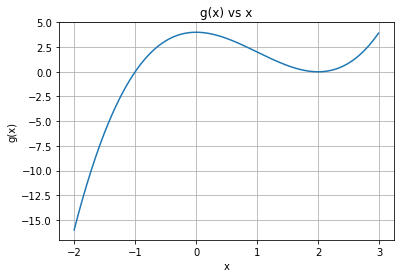

In [15]:
# Defining the function "g(x)" and its derivative as "g'(x)"
def g(x):
    result = (x-2)**2*(x+1)
    return result
def dg(x):
    result = 3*(x-2)*x
    return result

# Creating an array in the range -2 to 3 to plot g(x) against
x = np.arange(-2,3,0.01)
y = g(x)

# Plotting g(x)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("g(x)")
plt.grid()
plt.title("g(x) vs x")
plt.show()

Run the FindRootNewtonRaphson function with the final (optional) argument set to True to see the steps the algorithm takes. Run it with:
 - the initial value of $x_0 = 3$
 - the initial value of $x_0 = -2$

In [16]:
# Running the Newton-Raphson function for 3 and -2
FindRootNewtonRaphson(g, dg, 3, 10**-15, True)
FindRootNewtonRaphson(g, dg, -2, 10**-15, True)

#The convergence of the repeated root (x=2) takes longer (not reaching the required tolerance in the run time of the function)
#The convergence of the single root (x=-1) finishes in 7 loops of the function.

x_2 = 2.55555555555556
x_3 = 2.29790660225443
x_4 = 2.15539019921377
x_5 = 2.07956221041436
x_6 = 2.04028843517102
x_7 = 2.02027680978673
x_8 = 2.01017232343142
x_9 = 2.00509474109328
x_10 = 2.00254952808283
x_11 = 2.00127530502624
x_12 = 2.00063778796033
x_13 = 2.00031892786715
x_14 = 2.00015947240847
x_15 = 2.00007973832335
x_16 = 2.00003986969151
x_17 = 2.00001993497822
x_18 = 2.00000996752222
x_19 = 2.00000498376939
x_20 = 2.00000249188677
x_2 = -1.33333333333333
x_3 = -1.05555555555556
x_4 = -1.00194931773879
x_5 = -1.00000252829797
x_6 = -1.00000000000426
x_7 = -1.00000000000000
x_8 = -1.00000000000000


-1.0

What do you notice about the convergence rates in these two cases? Let's examine it more carefully. The function below returns the individual steps of the Newton-Raphson algorithm.

In [17]:
def FindRootNewtonRaphsonSteps(f, df, x0, tol):
    steps = np.array([x0])
    f0 = f(x0)
    count = 1
    while np.abs(f0) > tol:
        f0 = f(x0)
        x0 = x0 - f0/df(x0)
        steps = np.append(steps, x0)
        count += 1
    return steps

Using the above function:
- compute the steps for the function $g(x)$ with  $x_0 = 3$. Assign the result to a variable.
- compute the steps for the function $g(x)$ with  $x_0 = -2$. Assign the result to a different variable.

In [18]:
# Computing the steps for g(x) starting with 3, assigning the result to three_steps
three_steps = FindRootNewtonRaphsonSteps(g, dg, 3, 10**-15)
print(three_steps)

# Computing the steps for g(x) starting with -2, assigning the result to minus_two_steps
minus_two_steps = FindRootNewtonRaphsonSteps(g, dg, -2, 10**-15)
print(minus_two_steps)

[3.         2.55555556 2.2979066  2.1553902  2.07956221 2.04028844
 2.02027681 2.01017232 2.00509474 2.00254953 2.00127531 2.00063779
 2.00031893 2.00015947 2.00007974 2.00003987 2.00001993 2.00000997
 2.00000498 2.00000249 2.00000125 2.00000062 2.00000031 2.00000016
 2.00000008 2.00000004 2.00000002 2.00000001 2.        ]
[-2.         -1.33333333 -1.05555556 -1.00194932 -1.00000253 -1.
 -1.         -1.        ]


Plot the absolute difference between the steps and the root, i.e., $|x_n - x_*|$, on a log scale.

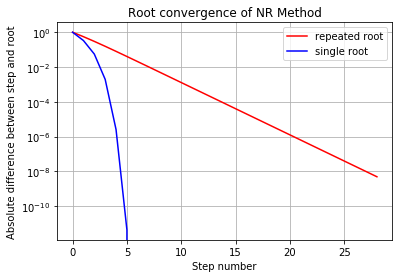

In [19]:
# Calculating the absolute differences between the roots and their respective steps.
# print statements included for debugging
abs_three_steps = abs(three_steps - 2)
#print(abs_three_steps)
abs_minus_two_steps = abs(minus_two_steps - -1)
#print(abs_minus_two_steps)

# Creating step number vector based on length of array
step_number_three = np.arange(0, np.size(abs_three_steps), 1)
step_number_two = np.arange(0, np.size(abs_minus_two_steps), 1)

# Plotting both absolute difference arrays on the same log plot
plt.plot(step_number_three, abs_three_steps, color = 'r', label='repeated root')
plt.plot(step_number_two, abs_minus_two_steps, color = 'b', label='single root')

plt.xlabel("Step number")
plt.ylabel("Absolute difference between step and root")
plt.yscale('log')
plt.title("Root convergence of NR Method")
plt.grid()
plt.legend()
plt.show()

# The difference for the repeated root looks linear on the log plot
# The difference for the single root looks quadratic on the log plot

You should find the difference for the repeated root looks linear on the log-scale, which is the same as we saw for the bisection method. This (correctly) suggests that for repeated roots the Newton-Raphson converges linearly (rather than quadratically)

**Commit this question to your git repository and push the changes to GitHub**

## Submitting the assignment

Submit the assignment the same way you did with the first one.

To submit your assignment you should zip the ACM20030-Assignments folder. Rename the zip file ACM20030-Assignments2-STUDENTNUMBER.zip where STUDENTNUMBER is your student number. Upload the zip file to BrightSpace.